Text(0, 0.5, 'Tax-Assessed Value')

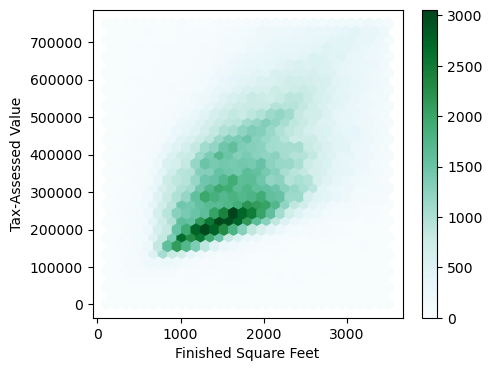

In [75]:
import pandas as pd

kc_tax = pd.read_csv('./datasets/kc_tax.csv')

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750_000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]

ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Text(0, 0.5, 'Tax-Assessed Value')

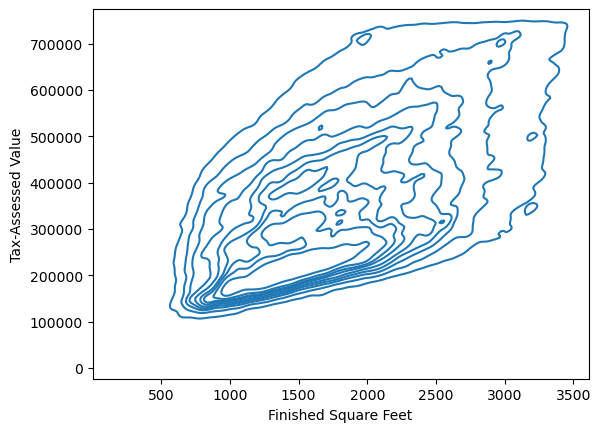

In [4]:
# Beware: this might take MINUTES to load, kde plotting is very expensive computationally
# If it takes too long, try raising the bandwidth with the bw_adjust parameter (defaults to 1)
import seaborn as sns
import pandas as pd

kc_tax = pd.read_csv('./datasets/kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]

ax = sns.kdeplot(data=kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue')
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

---
# Contingency Table

In [61]:
import pandas as pd
import numpy as np
lc_loans = pd.read_csv('./datasets/lc_loans.csv')
# The margins keyword argument will add the column and row sums.
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True).astype(np.int64)
# Create a copy of the pivot table, ignoring the column sums.
df = crosstab.loc['A':'G', :].copy().astype(np.float64)
# Divide the rows with the row sum.
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
# Divide the 'All' column by its sum.
df['All'] = df['All'] / sum(df['All'])

percentage_crosstab = df
percentage_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


---
# Boxplots For Numerical Data Grouped By Categorical Data

Text(0.5, 0.98, '')

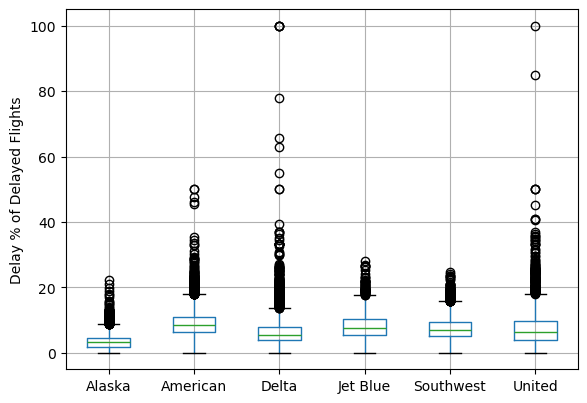

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

airline_stats = pd.read_csv('./datasets/airline_stats.csv')

ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Delay % of Delayed Flights')
ax.set_title('')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

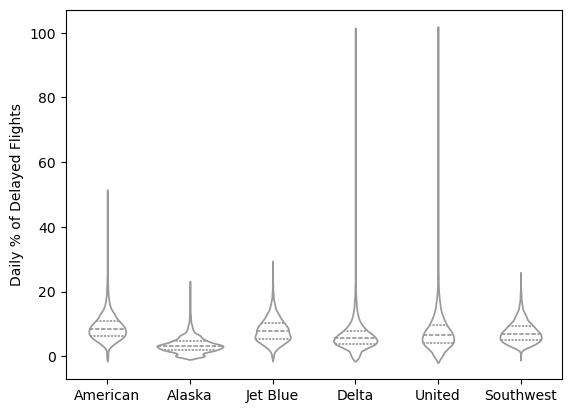

In [74]:
import seaborn as sns
import pandas as pd

airline_stats = pd.read_csv('./datasets/airline_stats.csv')
ax = sns.violinplot(data=airline_stats, x='airline', y= 'pct_carrier_delay', inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

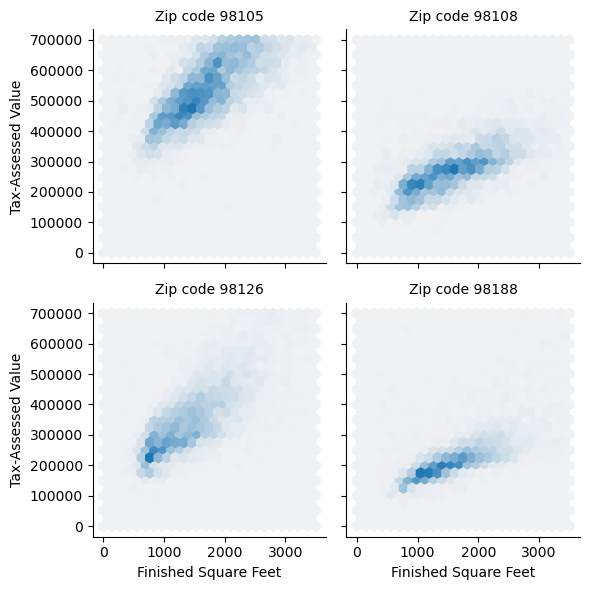

In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
kc_tax = pd.read_csv('./datasets/kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750_000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]
zip_codes= [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700_000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')